# Xarxa neuronal

In [3]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform as sp_rand
from scipy.stats import randint
from time import time
from sklearn import preprocessing

## Consum diari total multivariate multi-step

In [4]:
daily=pd.read_csv('C:/Users/Laura/Desktop/Smart meters London/workspace R/Dades netes/Final/daily_agr_mitjanaLlarPerDia_tot.csv')
daily.head(5)

,date,apparentTemperatureMax,apparentTemperatureMin,sunsetTimeHour,weekday,season,cloudCover,humidity,visibility,month,dewPoint,pressure,energy_sum
0,2014-02-08,5.67,2.19,17,6,winter,0.47,0.77,11.20,2,3.99,979.25,11.569300
1,2013-12-24,11.93,2.68,15,2,winter,0.40,0.81,10.86,12,5.42,979.52,11.981672
2,2012-11-01,11.46,0.85,16,4,autumn,0.44,0.85,12.54,11,5.06,979.63,10.781689
3,2014-02-05,5.86,1.03,16,3,winter,0.73,0.77,10.91,2,4.06,982.20,11.415105
4,2012-04-17,10.01,2.76,19,2,spring,0.60,0.87,11.86,4,5.74,982.22,10.617443


In [5]:
#Ens quedem amb date i energy_sum, ordenem valors per data i resetejem index
daily_dia=daily[['date','energy_sum','apparentTemperatureMax','apparentTemperatureMin','humidity','weekday','season' ]].sort_values(by=['date']).reset_index()
daily_dia.head(5)


,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,weekday,season
0,735,2011-11-23,6.952692,10.36,2.18,0.93,3,autumn
1,736,2011-11-24,8.536480,12.93,7.01,0.89,4,autumn
2,682,2011-11-25,9.499781,13.03,4.84,0.79,5,autumn
3,713,2011-11-26,10.267707,12.96,4.69,0.81,6,autumn
4,609,2011-11-27,10.850805,13.54,2.94,0.72,7,autumn


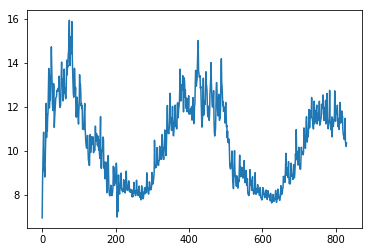

In [18]:
plt.plot(daily_dia.energy_sum )

In [6]:
daily_dia.season[daily_dia.season=='summer']=1
daily_dia.season[daily_dia.season=='spring']=2
daily_dia.season[daily_dia.season=='autumn']=3
daily_dia.season[daily_dia.season=='winter']=4


c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [7]:

daily_dia['y+1']=daily_dia['energy_sum'].shift(-1)
daily_dia['y+2']=daily_dia['energy_sum'].shift(-2)
daily_dia['y+3']=daily_dia['energy_sum'].shift(-3)
daily_dia['y+4']=daily_dia['energy_sum'].shift(-4)
daily_dia['y+5']=daily_dia['energy_sum'].shift(-5)
daily_dia['y+6']=daily_dia['energy_sum'].shift(-6)



daily_dia['t-1']=daily_dia['energy_sum'].shift(1)
daily_dia['t-2']=daily_dia['energy_sum'].shift(2)
daily_dia['t-3']=daily_dia['energy_sum'].shift(3)
daily_dia['t-4']=daily_dia['energy_sum'].shift(4)
daily_dia['t-5']=daily_dia['energy_sum'].shift(5)
daily_dia['t-6']=daily_dia['energy_sum'].shift(6)
daily_dia['t-7']=daily_dia['energy_sum'].shift(7)
daily_dia['t-8']=daily_dia['energy_sum'].shift(8)
daily_dia['t-9']=daily_dia['energy_sum'].shift(9)
daily_dia['t-10']=daily_dia['energy_sum'].shift(10)
daily_dia['t-11']=daily_dia['energy_sum'].shift(11)
daily_dia['t-12']=daily_dia['energy_sum'].shift(12)
daily_dia['t-13']=daily_dia['energy_sum'].shift(13)
daily_dia['t-14']=daily_dia['energy_sum'].shift(14)

daily_dia['temp(t-1)']=daily_dia['apparentTemperatureMax'].shift(1)
daily_dia['temp(t-2)']=daily_dia['apparentTemperatureMax'].shift(2)
daily_dia['temp(t-3)']=daily_dia['apparentTemperatureMax'].shift(3)
daily_dia['temp(t-4)']=daily_dia['apparentTemperatureMax'].shift(4)
daily_dia['temp(t-5)']=daily_dia['apparentTemperatureMax'].shift(5)
daily_dia['temp(t-6)']=daily_dia['apparentTemperatureMax'].shift(6)
daily_dia['temp(t-7)']=daily_dia['apparentTemperatureMax'].shift(7)
daily_dia['temp(t-8)']=daily_dia['apparentTemperatureMax'].shift(8)
daily_dia['temp(t-9)']=daily_dia['apparentTemperatureMax'].shift(9)
daily_dia['temp(t-10)']=daily_dia['apparentTemperatureMax'].shift(10)
daily_dia['temp(t-11)']=daily_dia['apparentTemperatureMax'].shift(11)
daily_dia['temp(t-12)']=daily_dia['apparentTemperatureMax'].shift(12)
daily_dia['temp(t-13)']=daily_dia['apparentTemperatureMax'].shift(13)
daily_dia['temp(t-14)']=daily_dia['apparentTemperatureMax'].shift(14)

daily_dia['tempmin(t-1)']=daily_dia['apparentTemperatureMin'].shift(1)
daily_dia['tempmin(t-2)']=daily_dia['apparentTemperatureMin'].shift(2)
daily_dia['tempmin(t-3)']=daily_dia['apparentTemperatureMin'].shift(3)
daily_dia['tempmin(t-4)']=daily_dia['apparentTemperatureMin'].shift(4)
daily_dia['tempmin(t-5)']=daily_dia['apparentTemperatureMin'].shift(5)
daily_dia['tempmin(t-6)']=daily_dia['apparentTemperatureMin'].shift(6)
daily_dia['tempmin(t-7)']=daily_dia['apparentTemperatureMin'].shift(7)
daily_dia['tempmin(t-8)']=daily_dia['apparentTemperatureMin'].shift(8)
daily_dia['tempmin(t-9)']=daily_dia['apparentTemperatureMin'].shift(9)
daily_dia['tempmin(t-10)']=daily_dia['apparentTemperatureMin'].shift(10)
daily_dia['tempmin(t-11)']=daily_dia['apparentTemperatureMin'].shift(11)
daily_dia['tempmin(t-12)']=daily_dia['apparentTemperatureMin'].shift(12)
daily_dia['tempmin(t-13)']=daily_dia['apparentTemperatureMin'].shift(13)
daily_dia['tempmin(t-14)']=daily_dia['apparentTemperatureMin'].shift(14)

daily_dia['humidity(t-1)']=daily_dia['humidity'].shift(1)
daily_dia['humidity(t-2)']=daily_dia['humidity'].shift(2)
daily_dia['humidity(t-3)']=daily_dia['humidity'].shift(3)
daily_dia['humidity(t-4)']=daily_dia['humidity'].shift(4)
daily_dia['humidity(t-5)']=daily_dia['humidity'].shift(5)
daily_dia['humidity(t-6)']=daily_dia['humidity'].shift(6)
daily_dia['humidity(t-7)']=daily_dia['humidity'].shift(7)
daily_dia['humidity(t-8)']=daily_dia['humidity'].shift(8)
daily_dia['humidity(t-9)']=daily_dia['humidity'].shift(9)
daily_dia['humidity(t-10)']=daily_dia['humidity'].shift(10)
daily_dia['humidity(t-11)']=daily_dia['humidity'].shift(11)
daily_dia['humidity(t-12)']=daily_dia['humidity'].shift(12)
daily_dia['humidity(t-13)']=daily_dia['humidity'].shift(13)
daily_dia['humidity(t-14)']=daily_dia['humidity'].shift(14)

daily_dia['weekday(t-1)']=daily_dia['weekday'].shift(1)
daily_dia['weekday(t-2)']=daily_dia['weekday'].shift(2)
daily_dia['weekday(t-3)']=daily_dia['weekday'].shift(3)
daily_dia['weekday(t-4)']=daily_dia['weekday'].shift(4)
daily_dia['weekday(t-5)']=daily_dia['weekday'].shift(5)
daily_dia['weekday(t-6)']=daily_dia['weekday'].shift(6)
daily_dia['weekday(t-7)']=daily_dia['weekday'].shift(7)
daily_dia['weekday(t-8)']=daily_dia['weekday'].shift(8)
daily_dia['weekday(t-9)']=daily_dia['weekday'].shift(9)
daily_dia['weekday(t-10)']=daily_dia['weekday'].shift(10)
daily_dia['weekday(t-11)']=daily_dia['weekday'].shift(11)
daily_dia['weekday(t-12)']=daily_dia['weekday'].shift(12)
daily_dia['weekday(t-13)']=daily_dia['weekday'].shift(13)
daily_dia['weekday(t-14)']=daily_dia['weekday'].shift(14)


daily_dia['season(t-1)']=daily_dia['season'].shift(1)
daily_dia['season(t-2)']=daily_dia['season'].shift(2)
daily_dia['season(t-3)']=daily_dia['season'].shift(3)
daily_dia['season(t-4)']=daily_dia['season'].shift(4)
daily_dia['season(t-5)']=daily_dia['season'].shift(5)
daily_dia['season(t-6)']=daily_dia['season'].shift(6)
daily_dia['season(t-7)']=daily_dia['season'].shift(7)
daily_dia['season(t-8)']=daily_dia['season'].shift(8)
daily_dia['season(t-9)']=daily_dia['season'].shift(9)
daily_dia['season(t-10)']=daily_dia['season'].shift(10)
daily_dia['season(t-11)']=daily_dia['season'].shift(11)
daily_dia['season(t-12)']=daily_dia['season'].shift(12)
daily_dia['season(t-13)']=daily_dia['season'].shift(13)
daily_dia['season(t-14)']=daily_dia['season'].shift(14)



daily_dia

,index,date,energy_sum,apparentTemperatureMax,apparentTemperatureMin,humidity,weekday,season,y+1,y+2,...,season(t-5),season(t-6),season(t-7),season(t-8),season(t-9),season(t-10),season(t-11),season(t-12),season(t-13),season(t-14)
0,735,2011-11-23,6.952692,10.36,2.18,0.93,3,3,8.536480,9.499781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736,2011-11-24,8.536480,12.93,7.01,0.89,4,3,9.499781,10.267707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,682,2011-11-25,9.499781,13.03,4.84,0.79,5,3,10.267707,10.850805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,713,2011-11-26,10.267707,12.96,4.69,0.81,6,3,10.850805,9.103382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,609,2011-11-27,10.850805,13.54,2.94,0.72,7,3,9.103382,9.274873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,641,2011-11-28,9.103382,12.58,1.31,0.86,1,3,9.274873,8.813513,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,2011-11-29,9.274873,13.47,3.39,0.82,2,3,8.813513,9.227707,...,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,571,2011-11-30,8.813513,11.87,3.34,0.78,3,3,9.227707,10.145910,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,199,2011-12-01,9.227707,12.15,5.29,0.82,4,3,10.145910,10.780273,...,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN
9,338,2011-12-02,10.145910,5.33,0.46,0.87,5,3,10.780273,12.163127,...,3,3,3,3,3,NaN,NaN,NaN,NaN,NaN


In [8]:
#Ens quedem amb energies i temperatures 
#No agafem apparent temperature max ja que quan fem la predicció representa que no ho sabem
daily_dia=daily_dia.drop(['index','date','apparentTemperatureMax','apparentTemperatureMin', 'humidity','weekday','season'], axis=1)
daily_dia.head(5)


,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,season(t-5),season(t-6),season(t-7),season(t-8),season(t-9),season(t-10),season(t-11),season(t-12),season(t-13),season(t-14)
0,6.952692,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.536480,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,6.952692,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.499781,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,8.536480,6.952692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.267707,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,9.499781,8.536480,6.952692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.850805,9.103382,9.274873,8.813513,9.227707,10.145910,10.780273,10.267707,9.499781,8.536480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Eliminem les 14 primeres files ja que contenen NaN (valors buits)

daily_dia=daily_dia.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
daily_dia.head(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,season(t-5),season(t-6),season(t-7),season(t-8),season(t-9),season(t-10),season(t-11),season(t-12),season(t-13),season(t-14)
14,10.889362,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,11.673417,10.609714,12.163127,...,3,3,3,3,3,3,3,3,3,3
15,11.525150,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,10.889362,11.673417,10.609714,...,3,3,3,3,3,3,3,3,3,3
16,11.759837,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,11.525150,10.889362,11.673417,...,3,3,3,3,3,3,3,3,3,3
17,12.633801,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,11.759837,11.525150,10.889362,...,3,3,3,3,3,3,3,3,3,3
18,13.749174,11.951958,11.957446,12.392776,12.307079,13.376080,13.511968,12.633801,11.759837,11.525150,...,3,3,3,3,3,3,3,3,3,3


In [10]:
daily_dia=daily_dia.drop([829,828,827,826,825,824,823])
daily_dia.tail(5)

,energy_sum,y+1,y+2,y+3,y+4,y+5,y+6,t-1,t-2,t-3,...,season(t-5),season(t-6),season(t-7),season(t-8),season(t-9),season(t-10),season(t-11),season(t-12),season(t-13),season(t-14)
818,11.582159,10.979566,10.781898,10.674624,10.573835,10.518126,10.776242,11.490470,11.816914,11.285737,...,4,4,4,4,4,4,4,4,4,4
819,10.979566,10.781898,10.674624,10.573835,10.518126,10.776242,11.480411,11.582159,11.490470,11.816914,...,4,4,4,4,4,4,4,4,4,4
820,10.781898,10.674624,10.573835,10.518126,10.776242,11.480411,10.411403,10.979566,11.582159,11.490470,...,4,4,4,4,4,4,4,4,4,4
821,10.674624,10.573835,10.518126,10.776242,11.480411,10.411403,10.294997,10.781898,10.979566,11.582159,...,4,4,4,4,4,4,4,4,4,4
822,10.573835,10.518126,10.776242,11.480411,10.411403,10.294997,10.202945,10.674624,10.781898,10.979566,...,4,4,4,4,4,4,4,4,4,4


In [9]:
len(daily_dia)


809

In [11]:

#normalitzem
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
daily_dia_norm=scaler.fit_transform(daily_dia)



c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:


#Seleccionem dades per test i train
y_daily=daily_dia_norm[:,0:7]
X_daily=daily_dia_norm[:,7:91]

#y_daily=daily_dia['energy_sum']
#X_daily=daily_dia.drop(['energy_sum'], axis='columns')



#Reshape de [samples,timesteps] a [samples,timesteps,features]

#Enlloc de 14 features en son 7 de una feature i 7 duna altre
X_daily=np.reshape(X_daily, (X_daily.shape[0], 14,6))



In [13]:

# definim model
import tensorflow as tf
model =Sequential()
model.add(LSTM(50, activation='relu', input_shape=(14, 6)))
model.add(Dense(7))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [14]:

import math
from sklearn.metrics import mean_squared_error

#Walk forward per test i train
minim=100
n_train=465
lenght=len(daily_dia)

llista_evaluate=list()
llista_prediccions=list()
llista_preditrain=list()
llista_scores=list()
llista_scoretrain=list()
sumScores=0

for i in range(n_train,lenght):
    #minim=minim+1
    X_train,X_test= X_daily[minim:i],X_daily[i:i+1]
    y_train,y_test= y_daily[minim:i],y_daily[i:i+1]

    #fem fit al model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #mostrem score per cada model
    score=model.evaluate(X_test,y_test,verbose=0)
    llista_evaluate.append(score)
    
    #Predim per cadascun
    preditest=model.predict(X_test)
    llista_prediccions.append(preditest)
    
    preditrain=model.predict(X_train)
    llista_preditrain.append(preditrain)
    
    trainScore = math.sqrt(mean_squared_error(y_train, preditrain))
    llista_scoretrain.append(trainScore )
    

    testScore = math.sqrt(mean_squared_error(y_test, preditest))
    llista_scores.append(testScore)
   
    sumScores=sumScores+testScore

Instructions for updating:
Use tf.cast instead.


In [15]:
#Dividim la suma de scores de test entre el nombre de prediccions per obtenir la mitjana
sumScores/(lenght-n_train)

0.06156958384585391

In [16]:
#Fem llista amb les prediccions
llista_p=list()
for i in range(len(llista_prediccions)):
    llista_p.append(llista_prediccions[i].tolist())
    
llista_p

[[[0.5612643361091614,
   0.6052665710449219,
   0.6175168752670288,
   0.6028528809547424,
   0.5617249608039856,
   0.5573030710220337,
   0.5593608617782593]],
 [[0.5933306217193604,
   0.6103984117507935,
   0.5754371285438538,
   0.5452040433883667,
   0.5214798450469971,
   0.5074516534805298,
   0.5246480703353882]],
 [[0.6908684968948364,
   0.620354950428009,
   0.5773647427558899,
   0.5588578581809998,
   0.5607693791389465,
   0.5425146222114563,
   0.606939971446991]],
 [[0.5734701752662659,
   0.534430742263794,
   0.5429115295410156,
   0.5288963913917542,
   0.5480433702468872,
   0.5939660668373108,
   0.6513373255729675]],
 [[0.5354743599891663,
   0.5447887778282166,
   0.5367196202278137,
   0.5194340944290161,
   0.6005176901817322,
   0.6258895397186279,
   0.6052290797233582]],
 [[0.5201318860054016,
   0.49786433577537537,
   0.5043585300445557,
   0.6059747934341431,
   0.6640403866767883,
   0.5696907639503479,
   0.5623305439949036]],
 [[0.48959898948669434,


In [17]:
#Fem llista amb la predicció de només el dia següent
llista_p0=list()
for i in range(len(llista_p)):
    llista_p0.append(llista_p[i][0][0])
    
#Fem llista amb la predicció de 2 dies
llista_p1=list()
for i in range(len(llista_p)):
    llista_p1.append(llista_p[i][0][1])
    
llista_p2=list()
for i in range(len(llista_p)):
    llista_p2.append(llista_p[i][0][2])
    
llista_p3=list()
for i in range(len(llista_p)):
    llista_p3.append(llista_p[i][0][3])
    
llista_p4=list()
for i in range(len(llista_p)):
    llista_p4.append(llista_p[i][0][4])
    
llista_p5=list()
for i in range(len(llista_p)):
    llista_p5.append(llista_p[i][0][5])
    
llista_p6=list()
for i in range(len(llista_p)):
    llista_p6.append(llista_p[i][0][6])



In [18]:
score0=math.sqrt(mean_squared_error(y_daily[n_train:lenght,0], llista_p0))
print("Error predicció 1 dia següent: {}".format(score0))
score1=math.sqrt(mean_squared_error(y_daily[n_train:lenght,1], llista_p1))
print("Error predicció 2 dia següent: {}".format(score1))
score2=math.sqrt(mean_squared_error(y_daily[n_train:lenght,2], llista_p2))
print("Error predicció 3 dia següent: {}".format(score2))
score3=math.sqrt(mean_squared_error(y_daily[n_train:lenght,3], llista_p3))
print("Error predicció 4 dia següent: {}".format(score3))
score4=math.sqrt(mean_squared_error(y_daily[n_train:lenght,4], llista_p4))
print("Error predicció 5 dia següent: {}".format(score4))
score5=math.sqrt(mean_squared_error(y_daily[n_train:lenght,5], llista_p5))
print("Error predicció 6 dia següent: {}".format(score5))

score6=math.sqrt(mean_squared_error(y_daily[n_train:lenght,6], llista_p6))
print("Error predicció 7 dia següent: {}".format(score6))


Error predicció 1 dia següent: 0.05146226737728889
Error predicció 2 dia següent: 0.06427961550676087
Error predicció 3 dia següent: 0.07047695992418186
Error predicció 4 dia següent: 0.0729435021088956
Error predicció 5 dia següent: 0.07387084787639028
Error predicció 6 dia següent: 0.07592566299040113
Error predicció 7 dia següent: 0.07798694442206162


In [19]:

predis=list()

for i in range(len(llista_prediccions)):
    predi=llista_prediccions[i].tolist()
    predis.append(predi)

predis=np.reshape(predis, (len(llista_prediccions),7)  )

predis

array([[0.56126434, 0.60526657, 0.61751688, ..., 0.56172496, 0.55730307,
        0.55936086],
       [0.59333062, 0.61039841, 0.57543713, ..., 0.52147985, 0.50745165,
        0.52464807],
       [0.6908685 , 0.62035495, 0.57736474, ..., 0.56076938, 0.54251462,
        0.60693997],
       ...,
       [0.47356462, 0.47453195, 0.54353803, ..., 0.47478223, 0.47679883,
        0.51499075],
       [0.40328908, 0.39076757, 0.39193285, ..., 0.58135939, 0.45182297,
        0.49897343],
       [0.47089735, 0.48615646, 0.49538165, ..., 0.53671372, 0.38485295,
        0.32116598]])

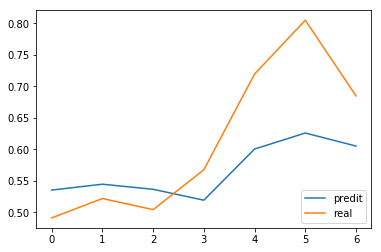

In [20]:
##Mostrem
plt.plot(predis[4], label="predit")
plt.plot(y_daily[n_train+4], label="real")
plt.legend(loc="lower right")
plt.show()

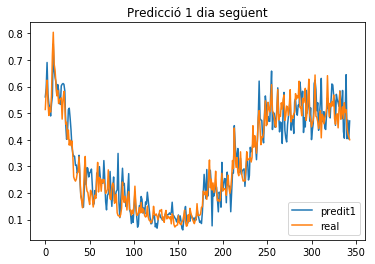

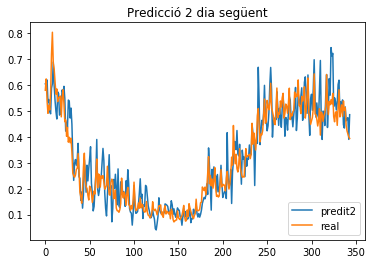

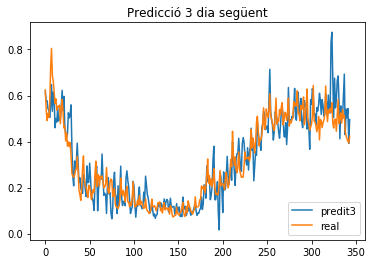

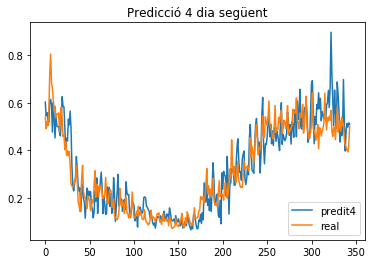

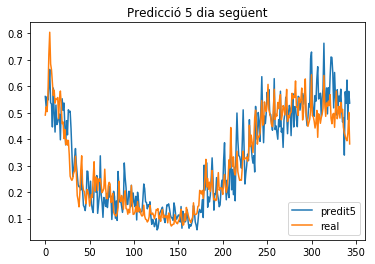

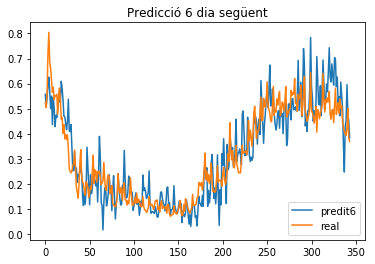

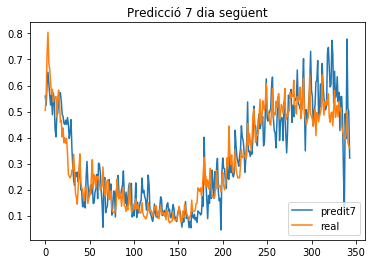

In [21]:
##Mostrem
plt.plot(llista_p0, label="predit1")
plt.plot(y_daily[n_train:lenght,0], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 1 dia següent")
plt.show()

plt.plot(llista_p1, label="predit2")
plt.plot(y_daily[n_train:lenght,1], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 2 dia següent")
plt.show()


plt.plot(llista_p2, label="predit3")
plt.plot(y_daily[n_train:lenght,2], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 3 dia següent")
plt.show()

plt.plot(llista_p3, label="predit4")
plt.plot(y_daily[n_train:lenght,3], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 4 dia següent")
plt.show()

plt.plot(llista_p4, label="predit5")
plt.plot(y_daily[n_train:lenght,4], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 5 dia següent")
plt.show()

plt.plot(llista_p5, label="predit6")
plt.plot(y_daily[n_train:lenght,5], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 6 dia següent")
plt.show()

plt.plot(llista_p6, label="predit7")
plt.plot(y_daily[n_train:lenght,6], label="real")
plt.legend(loc="lower right")
plt.title("Predicció 7 dia següent")
plt.show()

In [22]:
llista_scores

[0.048000259271243094,
 0.030303323857518664,
 0.07192815855304532,
 0.07900153404622705,
 0.09121942101070928,
 0.09251029767453237,
 0.13362539793688613,
 0.10189861270025444,
 0.15848615126839066,
 0.0341231037667943,
 0.04576268235910266,
 0.10428905734908885,
 0.07812303742722754,
 0.07223797617619207,
 0.04983760647974599,
 0.04152705530499698,
 0.04158662738824623,
 0.09298879643832857,
 0.07220219530106606,
 0.09175001740357158,
 0.07636301590966985,
 0.09467888476614962,
 0.06683713590375728,
 0.04333489142074415,
 0.05613345576419244,
 0.06351135381602949,
 0.15132278477798936,
 0.14032790544227153,
 0.16796846485480083,
 0.18463332566778218,
 0.0911639709176804,
 0.025930629036094874,
 0.0520254013352854,
 0.05379055779301485,
 0.045685073234993843,
 0.05269240701831841,
 0.06563377909659715,
 0.05428861035687651,
 0.04298551193283903,
 0.05455526849378208,
 0.04955024737658592,
 0.0360037909668253,
 0.06718485176531726,
 0.07003156977239365,
 0.036457290609759836,
 0.053283

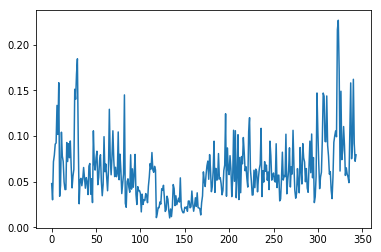

In [23]:
plt.plot(llista_scores)

In [24]:
#Creem un dataset amb format (nombre prediccions,17) per tornar les prediccions i els valors y als reals sense normalitzar
#El necessitem d'questa mida encara que només volguem passar 2 variables ja que al fer el minmax amb 17 variables
#per fer la inversa necessitem 17 variables
#Com que només en tenim 2, les ajuntem al dataset inicial i ens quedem amb 15 variables aleatories mes
#Obtenint un dataset amb 15 variables aleatories i les 2 variables que ens interessen (predi i y)


prova=daily_dia.iloc[n_train:lenght]
prova
#len(predis)
#lenght-n_train
#prova['predi']=predis
prova['predi1']=llista_p0
prova['predi2']=llista_p1
prova['predi3']=llista_p2
prova['predi4']=llista_p3
prova['predi5']=llista_p4
prova['predi6']=llista_p5
prova['predi7']=llista_p6

prova['y1']=y_daily[n_train:lenght,0]
prova['y2']=y_daily[n_train:lenght,1]
prova['y3']=y_daily[n_train:lenght,2]
prova['y4']=y_daily[n_train:lenght,3]
prova['y5']=y_daily[n_train:lenght,4]
prova['y6']=y_daily[n_train:lenght,5]
prova['y7']=y_daily[n_train:lenght,6]


prova=prova.drop(['energy_sum','t-1','t-2','t-3', 't-4', 't-5', 't-6', 't-7'], axis=1)
prova

prova=prova[['predi1','predi2','predi3','predi4','predi5','predi6','predi7','y1','y2','y3','y4','y5','y6','y7','t-8','t-9','t-10','t-11','t-12','t-13','t-14','temp(t-1)','temp(t-2)','temp(t-3)','temp(t-4)','temp(t-5)','temp(t-6)','temp(t-7)','temp(t-8)','temp(t-9)','temp(t-10)','temp(t-11)','temp(t-12)','temp(t-13)','temp(t-14)','tempmin(t-1)','tempmin(t-2)','tempmin(t-3)','tempmin(t-4)','tempmin(t-5)','tempmin(t-6)','tempmin(t-7)','tempmin(t-8)','tempmin(t-9)','tempmin(t-10)','tempmin(t-11)','tempmin(t-12)','tempmin(t-13)','tempmin(t-14)','humidity(t-1)','humidity(t-2)','humidity(t-3)','humidity(t-4)','humidity(t-5)','humidity(t-6)','humidity(t-7)','humidity(t-8)','humidity(t-9)','humidity(t-10)','humidity(t-11)','humidity(t-12)','humidity(t-13)','humidity(t-14)','weekday(t-1)','weekday(t-2)','weekday(t-3)','weekday(t-4)','weekday(t-5)','weekday(t-6)','weekday(t-7)','weekday(t-8)','weekday(t-9)','weekday(t-10)','weekday(t-11)','weekday(t-12)','weekday(t-13)','weekday(t-14)','season(t-1)','season(t-2)','season(t-3)','season(t-4)','season(t-5)','season(t-6)','season(t-7)','season(t-8)','season(t-9)','season(t-10)','season(t-11)','season(t-12)','season(t-13)','season(t-14)']]
prova



c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\laura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,predi1,predi2,predi3,predi4,predi5,predi6,predi7,y1,y2,y3,...,season(t-5),season(t-6),season(t-7),season(t-8),season(t-9),season(t-10),season(t-11),season(t-12),season(t-13),season(t-14)
479,0.561264,0.605267,0.617517,0.602853,0.561725,0.557303,0.559361,0.514061,0.580609,0.624326,...,4,4,4,4,4,4,4,4,4,4
480,0.593331,0.610398,0.575437,0.545204,0.521480,0.507452,0.524648,0.580609,0.624326,0.539280,...,4,4,4,4,4,4,4,4,4,4
481,0.690868,0.620355,0.577365,0.558858,0.560769,0.542515,0.606940,0.624326,0.539280,0.491355,...,4,4,4,4,4,4,4,4,4,4
482,0.573470,0.534431,0.542912,0.528896,0.548043,0.593966,0.651337,0.539280,0.491355,0.522145,...,4,4,4,4,4,4,4,4,4,4
483,0.535474,0.544789,0.536720,0.519434,0.600518,0.625890,0.605229,0.491355,0.522145,0.504442,...,4,4,4,4,4,4,4,4,4,4
484,0.520132,0.497864,0.504359,0.605975,0.664040,0.569691,0.562331,0.522145,0.504442,0.567725,...,4,4,4,4,4,4,4,4,4,4
485,0.489599,0.489711,0.555392,0.614664,0.538330,0.500710,0.524761,0.504442,0.567725,0.719460,...,4,4,4,4,4,4,4,4,4,4
486,0.534922,0.588407,0.647456,0.590958,0.532654,0.550713,0.563488,0.567725,0.719460,0.804631,...,4,4,4,4,4,4,4,4,4,4
487,0.563732,0.605978,0.531336,0.477458,0.446531,0.437215,0.487825,0.719460,0.804631,0.684716,...,4,4,4,4,4,4,4,4,4,4
488,0.760194,0.689556,0.615470,0.601397,0.593790,0.543452,0.571138,0.804631,0.684716,0.662177,...,4,4,4,4,4,4,4,4,4,4


In [25]:
# Convert predictions back to normal values

predi = scaler.inverse_transform(prova)
print(predi)
#0-6 predi
print(predi[0][0])
print(predi[0][1])
print(predi[0][2])
print(predi[0][3])
print(predi[0][4])
print(predi[0][5])
print(predi[0][6])

#7-13 y

print(predi[0][7])
print(predi[0][8])
print(predi[0][9])
print(predi[0][10])
print(predi[0][11])
print(predi[0][12])
print(predi[0][13])


[[12.01334699 12.40718775 12.51683375 ... 13.         13.
  13.        ]
 [12.30035537 12.45312015 12.14020017 ... 13.         13.
  13.        ]
 [13.17336537 12.54223587 12.15745322 ... 13.         13.
  13.        ]
 ...
 [11.2283932  11.2370512  11.85468822 ... 13.         13.
  13.        ]
 [10.59939391 10.48732053 10.49775026 ... 13.         13.
  13.        ]
 [11.2045198  11.3410961  11.4236659  ... 13.         13.
  13.        ]]
12.013346989284086
12.407187751745315
12.516833754096336
12.38558408668491
12.017469797620592
11.977891797871582
11.99630999598358
11.590859170709699
12.186486909458
12.5777825527296
11.816572589134799
11.3876267050719
11.6632140210701
11.5047561338867


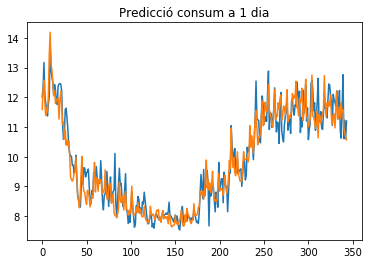

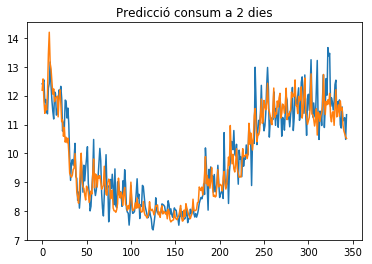

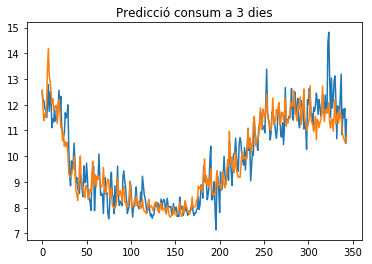

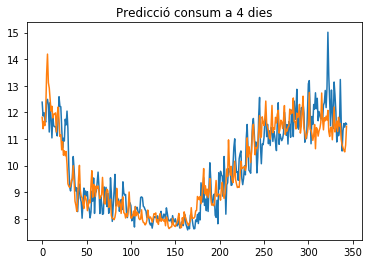

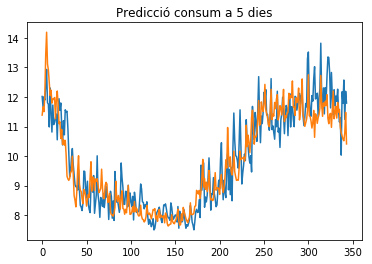

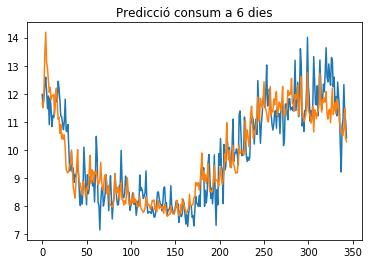

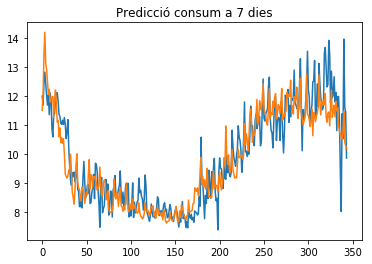

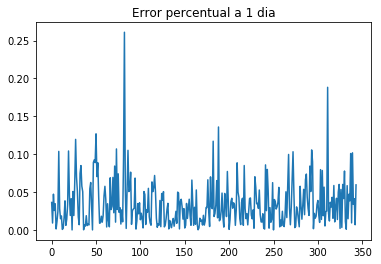

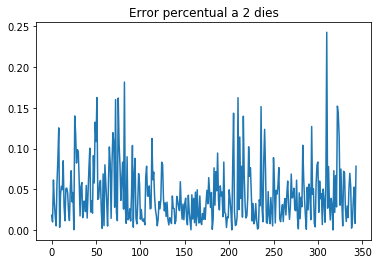

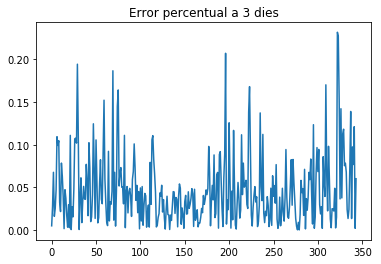

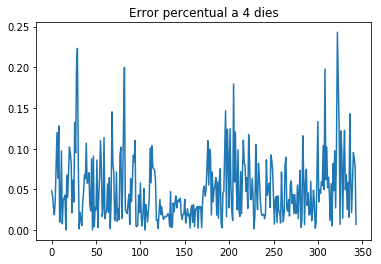

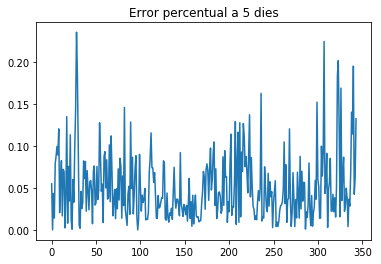

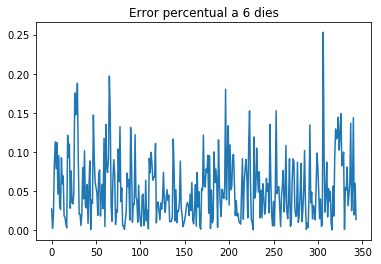

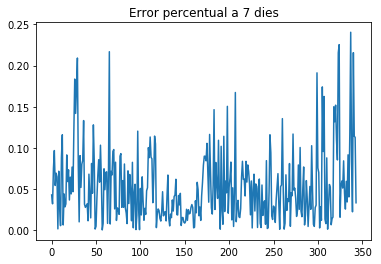

L'error mitjà a 1 dia és de 3.4457691113463613 % 
L'error mitjà a 2 dies és de 4.379628225399063 % 
L'error mitjà a 3 dies és de 4.635675119622094 % 
L'error mitjà a 4 dies és de 4.9615905778450475 % 
L'error mitjà a 5 dies és de 5.139195232117659 % 
L'error mitjà a 6 dies és de 5.299377130256948 % 
L'error mitjà a 7 dies és de 5.260351754615196 % 


In [26]:
llista1=list()
llista2=list()
llista3=list()
llista4=list()
llista5=list()
llista6=list()
llista7=list()
llista8=list()
llista9=list()
llista10=list()
llista11=list()
llista12=list()
llista13=list()
llista14=list()




llista_errors1=list()
llista_errorsabs1=list()
llista_errorsres1=list()


llista_errors2=list()
llista_errorsabs2=list()
llista_errorsres2=list()


llista_errors3=list()
llista_errorsabs3=list()
llista_errorsres3=list()

llista_errors4=list()
llista_errorsabs4=list()
llista_errorsres4=list()

llista_errors5=list()
llista_errorsabs5=list()
llista_errorsres5=list()

llista_errors6=list()
llista_errorsabs6=list()
llista_errorsres6=list()

llista_errors7=list()
llista_errorsabs7=list()
llista_errorsres7=list()


    
for i in range(len(predi)):
    
    llista1.append(predi[i][0])
    llista2.append(predi[i][1])
    llista3.append(predi[i][2])
    llista4.append(predi[i][3])
    llista5.append(predi[i][4])
    llista6.append(predi[i][5])
    llista7.append(predi[i][6])
    llista8.append(predi[i][7])
    llista9.append(predi[i][8])
    llista10.append(predi[i][9])
    llista11.append(predi[i][10])
    llista12.append(predi[i][11])
    llista13.append(predi[i][12])
    llista14.append(predi[i][13])
    
    valor1=predi[i][7] - predi[i][0]
    valorabs1=math.fabs(valor1)
    valorrespecte1=valorabs1/predi[i][7]
    llista_errors1.append(valor1)
    llista_errorsabs1.append(valorabs1)
    llista_errorsres1.append(valorrespecte1)
    
    valor2=predi[i][8] - predi[i][1]
    valorabs2=math.fabs(valor2)
    valorrespecte2=valorabs2/predi[i][8]
    llista_errors2.append(valor2)
    llista_errorsabs2.append(valorabs2)
    llista_errorsres2.append(valorrespecte2)
    
    valor3=predi[i][9] - predi[i][2]
    valorabs3=math.fabs(valor3)
    valorrespecte3=valorabs3/predi[i][9]
    llista_errors3.append(valor3)
    llista_errorsabs3.append(valorabs3)
    llista_errorsres3.append(valorrespecte3)
    
    valor4=predi[i][10] - predi[i][3]
    valorabs4=math.fabs(valor4)
    valorrespecte4=valorabs4/predi[i][10]
    llista_errors4.append(valor4)
    llista_errorsabs4.append(valorabs4)
    llista_errorsres4.append(valorrespecte4)
    
    valor5=predi[i][11] - predi[i][4]
    valorabs5=math.fabs(valor5)
    valorrespecte5=valorabs5/predi[i][11]
    llista_errors5.append(valor5)
    llista_errorsabs5.append(valorabs5)
    llista_errorsres5.append(valorrespecte5)
    
    valor6=predi[i][12] - predi[i][5]
    valorabs6=math.fabs(valor6)
    valorrespecte6=valorabs6/predi[i][12]
    llista_errors6.append(valor6)
    llista_errorsabs6.append(valorabs6)
    llista_errorsres6.append(valorrespecte6)
    
    valor7=predi[i][13] - predi[i][6]
    valorabs7=math.fabs(valor7)
    valorrespecte7=valorabs7/predi[i][13]
    llista_errors7.append(valor7)
    llista_errorsabs7.append(valorabs7)
    llista_errorsres7.append(valorrespecte7)
    
    
plt.plot(llista1)
plt.plot(llista8)
plt.title("Predicció consum a 1 dia")
plt.show()

plt.plot(llista2)
plt.plot(llista9)
plt.title("Predicció consum a 2 dies")
plt.show()

plt.plot(llista3)
plt.plot(llista10)
plt.title("Predicció consum a 3 dies")
plt.show()

plt.plot(llista4)
plt.plot(llista11)
plt.title("Predicció consum a 4 dies")
plt.show()

plt.plot(llista5)
plt.plot(llista12)
plt.title("Predicció consum a 5 dies")
plt.show()

plt.plot(llista6)
plt.plot(llista13)
plt.title("Predicció consum a 6 dies")
plt.show()

plt.plot(llista7)
plt.plot(llista14)
plt.title("Predicció consum a 7 dies")
plt.show()




plt.plot(llista_errorsres1)
plt.title("Error percentual a 1 dia")
plt.show()
plt.plot(llista_errorsres2)
plt.title("Error percentual a 2 dies")
plt.show()
plt.plot(llista_errorsres3)
plt.title("Error percentual a 3 dies")
plt.show()
plt.plot(llista_errorsres4)
plt.title("Error percentual a 4 dies")
plt.show()
plt.plot(llista_errorsres5)
plt.title("Error percentual a 5 dies")
plt.show()
plt.plot(llista_errorsres6)
plt.title("Error percentual a 6 dies")
plt.show()
plt.plot(llista_errorsres7)
plt.title("Error percentual a 7 dies")
plt.show()



error_mitja1=sum(llista_errorsres1)/(len(llista_errorsres1))*100
error_mitja2=sum(llista_errorsres2)/(len(llista_errorsres2))*100
error_mitja3=sum(llista_errorsres3)/(len(llista_errorsres3))*100
error_mitja4=sum(llista_errorsres4)/(len(llista_errorsres4))*100
error_mitja5=sum(llista_errorsres5)/(len(llista_errorsres5))*100
error_mitja6=sum(llista_errorsres6)/(len(llista_errorsres6))*100
error_mitja7=sum(llista_errorsres7)/(len(llista_errorsres7))*100


print("L'error mitjà a 1 dia és de {} % " .format(error_mitja1))
print("L'error mitjà a 2 dies és de {} % " .format(error_mitja2))
print("L'error mitjà a 3 dies és de {} % " .format(error_mitja3))
print("L'error mitjà a 4 dies és de {} % " .format(error_mitja4))
print("L'error mitjà a 5 dies és de {} % " .format(error_mitja5))
print("L'error mitjà a 6 dies és de {} % " .format(error_mitja6))
print("L'error mitjà a 7 dies és de {} % " .format(error_mitja7))

In [27]:
(error_mitja1+error_mitja2+error_mitja3+error_mitja4+error_mitja5+error_mitja6+error_mitja7)/7

4.731655307314624